a.x=-0.6666666666666666
a.x=0.33333333333333337


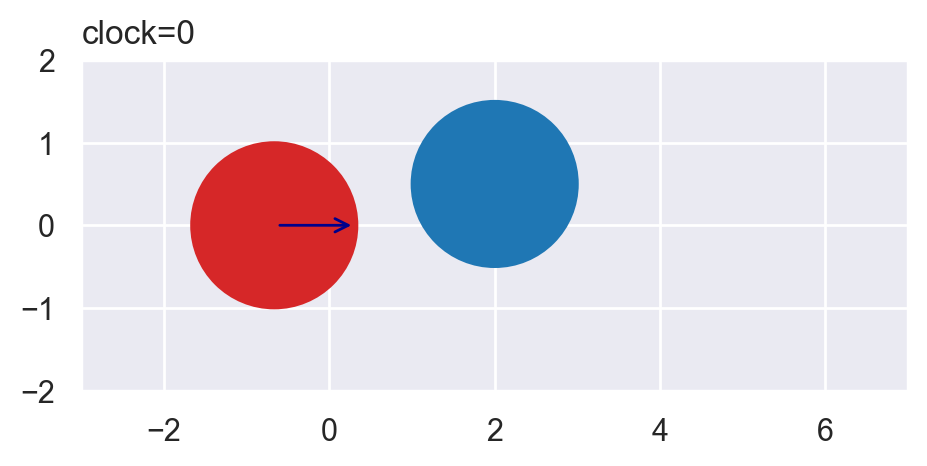

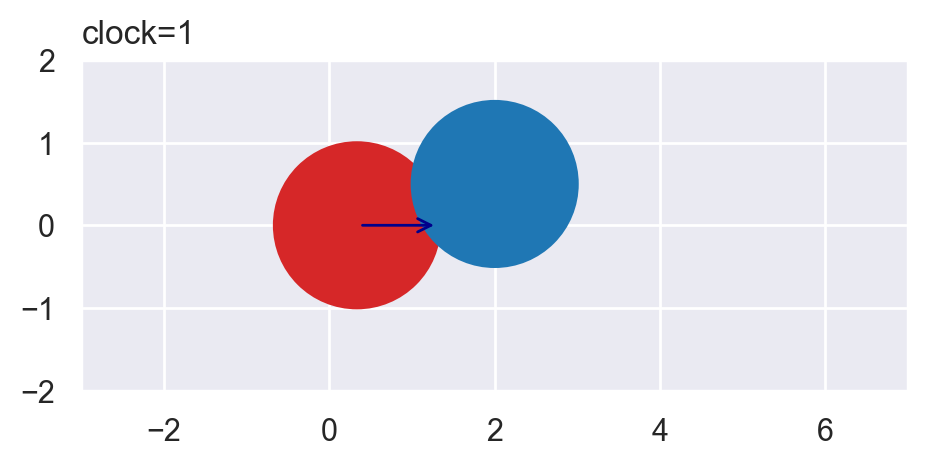

In [ ]:
# Show what happens when you increment time by a fixed amount

from perfect_physics import Circle, World

a = Circle(x=-2/3, y=0, r=1, vx=1, vy=0, m=1)
b = Circle(x=2, y=1/2, r=1, vx=0, vy=0, m=1)
world = World([a, b], [],  xlim=(-3, 7), ylim=(-2, 2))
world.show(colors=["tab:red", "tab:blue"], font_scale=2)
print(f"a.x={float(a.x)}")
world._tick_no_collision(1)
world.show(colors=["tab:red", "tab:blue"], font_scale=2)
print(f"a.x={float(a.x)}")
pass

In [ ]:
import numpy as np
from ipywidgets import interact
import seaborn as sns
from matplotlib import patches
from matplotlib import pyplot as plt

a_x = -2/3; a_y = 0; a_vx = 1; a_vy = 0; a_r = 1
b_x = 2; b_y = 1; b_vx = 1/2; b_vy = -1/2; b_r = 1

def f(t):
    aprime_x = a_x + a_vx * t
    aprime_y = a_y + a_vy * t
    bprime_x = b_x + b_vx * t
    bprime_y = b_y + b_vy * t
    distance = np.sqrt((aprime_x - bprime_x) ** 2 + (aprime_y - bprime_y) ** 2)
    print(f"distance {distance} =?= {a_r + b_r}")

    sns.set()
    figure, axes = plt.subplots()
    axes.set_aspect(1)
    axes.set_xlim(-3.0, 7.0)
    axes.set_ylim(-2.0, 3.0)
    axes.add_patch(patches.Circle((aprime_x, aprime_y), a_r, color="tab:red"))
    axes.add_patch(patches.Circle((bprime_x, bprime_y), a_r, color="tab:blue"))

interact(f, t=(-1, 6, .1), continuous_update=False)

interactive(children=(FloatSlider(value=2.0, description='t', max=6.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.f(t)>

In [ ]:
from sympy import symbols, Eq, nonlinsolve, S, sqrt

t = symbols("t") # define symbols
a_x, a_y, a_vx, a_vy, a_r, aprime_x, aprime_y = symbols(
    "a_x, a_y, a_vx, a_vy, a_r, a'_x, a'_y"
)
b_x, b_y, b_vx, b_vy, b_r, bprime_x, bprime_y = symbols(
    "b_x, b_y, b_vx, b_vy, b_r, b'_x, b'_y"
)

# define equations
eq1 = Eq(aprime_x, a_x + a_vx * t)
eq2 = Eq(aprime_y, a_y + a_vy * t)
eq3 = Eq(bprime_x, b_x + b_vx * t)
eq4 = Eq(bprime_y, b_y + b_vy * t)
eq5 = Eq((aprime_x - bprime_x) ** 2 + (aprime_y - bprime_y) ** 2, (a_r + b_r) ** 2)

cc_all_solutions = nonlinsolve([eq1, eq2, eq3, eq4, eq5], t, aprime_x, aprime_y, bprime_x, bprime_y)
cc_time_solutions = [t for t, aprime_x, ap_y, bp_x, bp_y in cc_all_solutions]
cc_time_solutions[0]

(-a_vx*a_x + a_vx*b_x - a_vy*a_y + a_vy*b_y + a_x*b_vx + a_y*b_vy - b_vx*b_x - b_vy*b_y + sqrt(a_r**2*a_vx**2 - 2*a_r**2*a_vx*b_vx + a_r**2*a_vy**2 - 2*a_r**2*a_vy*b_vy + a_r**2*b_vx**2 + a_r**2*b_vy**2 + 2*a_r*a_vx**2*b_r - 4*a_r*a_vx*b_r*b_vx + 2*a_r*a_vy**2*b_r - 4*a_r*a_vy*b_r*b_vy + 2*a_r*b_r*b_vx**2 + 2*a_r*b_r*b_vy**2 - a_vx**2*a_y**2 + 2*a_vx**2*a_y*b_y + a_vx**2*b_r**2 - a_vx**2*b_y**2 + 2*a_vx*a_vy*a_x*a_y - 2*a_vx*a_vy*a_x*b_y - 2*a_vx*a_vy*a_y*b_x + 2*a_vx*a_vy*b_x*b_y - 2*a_vx*a_x*a_y*b_vy + 2*a_vx*a_x*b_vy*b_y + 2*a_vx*a_y**2*b_vx - 4*a_vx*a_y*b_vx*b_y + 2*a_vx*a_y*b_vy*b_x - 2*a_vx*b_r**2*b_vx + 2*a_vx*b_vx*b_y**2 - 2*a_vx*b_vy*b_x*b_y - a_vy**2*a_x**2 + 2*a_vy**2*a_x*b_x + a_vy**2*b_r**2 - a_vy**2*b_x**2 + 2*a_vy*a_x**2*b_vy - 2*a_vy*a_x*a_y*b_vx + 2*a_vy*a_x*b_vx*b_y - 4*a_vy*a_x*b_vy*b_x + 2*a_vy*a_y*b_vx*b_x - 2*a_vy*b_r**2*b_vy - 2*a_vy*b_vx*b_x*b_y + 2*a_vy*b_vy*b_x**2 - a_x**2*b_vy**2 + 2*a_x*a_y*b_vx*b_vy - 2*a_x*b_vx*b_vy*b_y + 2*a_x*b_vy**2*b_x - a_y**2*b_vx**2

In [ ]:
ts = [
    t.subs(
        {
            a_x: S(-2) / 3,
            a_y: 0,
            a_vx: 1,
            a_vy: 0,
            a_r: 1,
            b_x: 2,
            b_y: 1,
            b_vx: S(1) / 2,
            b_vy: S(-1) / 2,
            b_r: 1,
        }
    )
    for t in cc_time_solutions
]
print(ts)
print([float(t) for t in ts])


[sqrt(47)/3 + 11/3, 11/3 - sqrt(47)/3]
[5.951884866800348, 1.3814484665329854]


In [ ]:
float(sqrt(47)/3 + 11/3), float(11/3 - sqrt(47)/3)

(5.951884866800348, 1.3814484665329851)

In [ ]:
from sympy import symbols, Eq, sqrt
a_x, a_y, a_vx, a_vy, a_r, a_m, ahat_vx, ahat_vy = symbols("a_x, a_y, a_vx, a_vy, a_r, a_m, ahat_vx, ahat_vy")
b_x, b_y, b_vx, b_vy, b_r, b_m, bhat_vx, bhat_vy = symbols("b_x, b_y, b_vx, b_vy, b_r, b_m, bhat_vx, bhat_vy")


# conservation of energy
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2
eq1 = Eq(energy_before, energy_after)

# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx, a_m * ahat_vx + b_m * bhat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy, a_m * ahat_vy + b_m * bhat_vy)

# conservation of glancing velocity
d = sqrt((b_x-a_x)**2 + (b_y-a_y)**2)
ux = -(b_y-a_y)/d
uy = (b_x-a_x)/d
eq4 = Eq((b_vx - a_vx) * ux + (b_vy - a_vy) * uy, (bhat_vx-ahat_vx) * ux + (bhat_vy-ahat_vy) * uy)

In [ ]:
from sympy import Rational, sqrt
from perfect_physics import Circle, World
from pathlib import Path

root = Path("M:/projects/perfect_physics")

for seed in range(2):
    left = Circle(x=-3, y=0, r=1, vx=1, vy=0, m=1)
    middle = Circle(x=0, y=0, r=1, vx=0, vy=0, m=1)
    right = Circle(x=4, y=0, r=2, vx=-1, vy=0, m=4)
    world = World([left, middle, right], xlim=(-10, 10), ylim=(-3, 3), rng=seed)
    # world.run_in_place(4,show=True, font_scale=1)
    print(f"seed={seed},vx={[circle.vx for circle in world.circle_list]}")

    folder = root / f"part5/pydata/three_line.{seed}"
    world.run_to_file(folder, 20)
    World.render(folder, fps=120, speed_up=.5, draw_radius=0.9)
pass


left 1, middle 0, right -1
left 0, middle 1, right -1
left 0, middle -11/5, right -1/5
left -11/5, middle 0, right -1/5
left -11/5, middle -8/25, right -3/25
left -11/5, middle -8/25, right -3/25
left 1, middle 0, right -1
left 1, middle -8/5, right -3/5
left -8/5, middle 1, right -3/5
left -8/5, middle -39/25, right 1/25
left -8/5, middle -39/25, right 1/25
left -8/5, middle -39/25, right 1/25


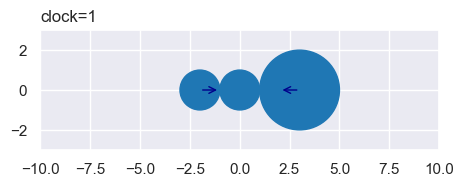

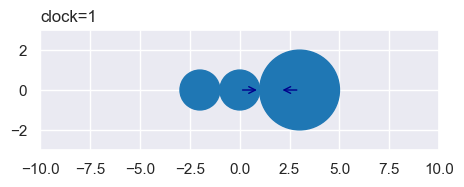

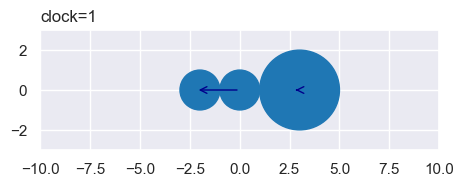

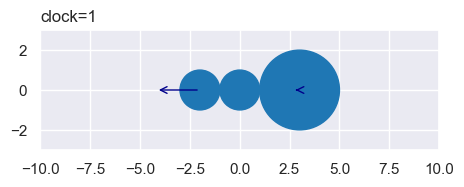

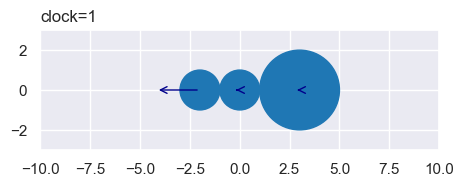

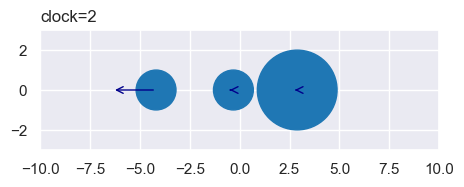

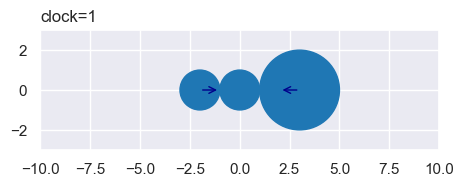

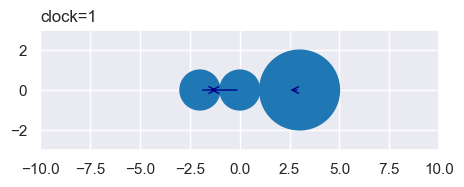

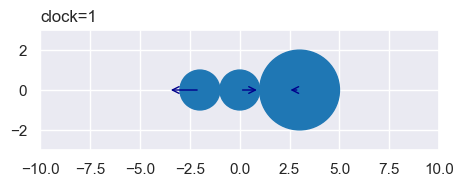

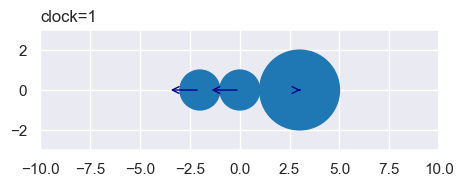

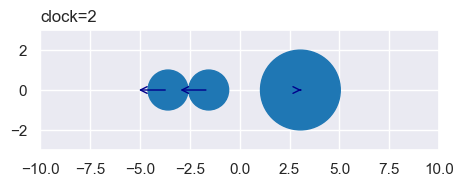

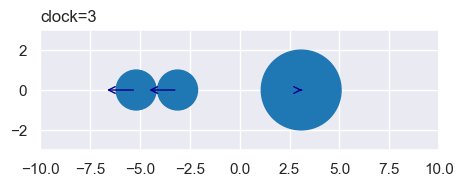

In [ ]:
import numpy as np
from perfect_physics import World, Circle, Timeline
from pathlib import Path
import logging

# logging.basicConfig(level=logging.INFO)

root = Path("M:/projects/perfect_physics")
for index in range(0,2):
    left = Circle(x=-3, y=0, r=1, vx=1, vy=0, m=1, id="left")
    middle = Circle(x=0, y=0, r=1, vx=0, vy=0, m=1, id="middle")
    right = Circle(x=4, y=0, r=2, vx=-1, vy=0, m=4, id="right")
    hint_ssca_list = []
    world = World([left, middle, right], xlim=(-10, 10), ylim=(-3, 3), rng=0)
    ss_calist, _ = world._tick(Timeline(), [])
    s0, s1, calist = ss_calist
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    world._tock([s0, s1, calist[index:index+1]], [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    # world.show()
    # print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    world._tock(ss_calist, [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    # world.show()
    # print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    world._tock(ss_calist, [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    world._tock(ss_calist, [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")

    pass


In [ ]:
from sympy import symbols, Eq, nonlinsolve
a_vx, a_m, ahat_vx =  symbols("a_vx, a_m, ahat_vx")
b_vx, b_m, bhat_vx =  symbols("b_vx, b_m, bhat_vx")
c_vx, c_m, chat_vx =  symbols("c_vx, c_m, chat_vx")

# conservation of energy
energy_before = a_m * a_vx**2 / 2 + b_m * b_vx**2 / 2 + c_m * c_vx**2 / 2
energy_after = a_m * ahat_vx**2 / 2 + b_m * bhat_vx**2 / 2 + c_m * chat_vx**2 / 2
eq1 = Eq(energy_before, energy_after)
# conservation of momentum (x)
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)

three_in_a_row = nonlinsolve([eq1, eq2], [bhat_vx, chat_vx])


In [ ]:
three_in_a_row

{((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx - c_m*((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx)/(b_m + c_m) - sqrt(-b_m*c_m*(a_m**2*a_vx**2 - 2*a_m**2*a_vx*ahat_vx + a_m**2*ahat_vx**2 - a_m*a_vx**2*b_m - a_m*a_vx**2*c_m + 2*a_m*a_vx*b_m*b_vx + 2*a_m*a_vx*c_m*c_vx + a_m*ahat_vx**2*b_m + a_m*ahat_vx**2*c_m - 2*a_m*ahat_vx*b_m*b_vx - 2*a_m*ahat_vx*c_m*c_vx - b_m*b_vx**2*c_m + 2*b_m*b_vx*c_m*c_vx - b_m*c_m*c_vx**2))/(c_m*(b_m + c_m))))/b_m, (a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx)/(b_m + c_m) - sqrt(-b_m*c_m*(a_m**2*a_vx**2 - 2*a_m**2*a_vx*ahat_vx + a_m**2*ahat_vx**2 - a_m*a_vx**2*b_m - a_m*a_vx**2*c_m + 2*a_m*a_vx*b_m*b_vx + 2*a_m*a_vx*c_m*c_vx + a_m*ahat_vx**2*b_m + a_m*ahat_vx**2*c_m - 2*a_m*ahat_vx*b_m*b_vx - 2*a_m*ahat_vx*c_m*c_vx - b_m*b_vx**2*c_m + 2*b_m*b_vx*c_m*c_vx - b_m*c_m*c_vx**2))/(c_m*(b_m + c_m))), ((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx - c_m*((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx)/(b_m + c_m) + sqrt(-b_m*c_m*(a_m**2*a_vx**2 - 2*a_m**2*a_vx*ahat_

4744


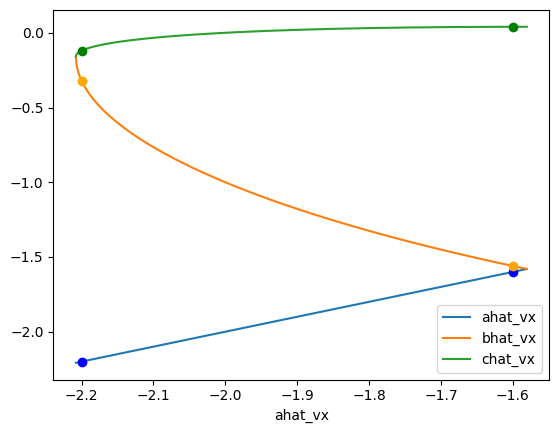

872


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import S

details = {a_m:1, b_m:1, c_m:4, a_vx:1, b_vx:0, c_vx:-1}
game = [[-11/5,-8/25,-3/25],[-8/5,-39/25, 1/25]]
a = np.linspace(-2.3,1.3,5_000)
for b, c in list(three_in_a_row):
    b = np.array([b.subs(details).subs("ahat_vx", ai) for ai in a])
    c = np.array([c.subs(details).subs("ahat_vx", ai) for ai in a])
    b_mask = [np.isreal(complex(bi)) for bi in b]
    c_mask = [np.isreal(complex(ci)) for ci in c]
    bc_mask = np.logical_and(b_mask, c_mask)
    a = np.array(a[bc_mask])
    b = np.array(b[bc_mask])
    c = np.array(c[bc_mask])
    if True:
        order_mask =np.array([ai <= bi <= ci for ai, bi, ci in zip(a, b, c)], dtype=bool)
        print(len(order_mask))
        a = a[order_mask]
        b = b[order_mask]
        c = c[order_mask]
    if len(a) == 0:
        continue

    plt.plot(a, a, label="ahat_vx")
    plt.plot(a, b, label="bhat_vx")
    plt.plot(a, c, label="chat_vx")
    plt.legend()
    plt.xlabel("ahat_vx")


    for ag, bg, cg in game:
        plt.plot(ag, ag,  marker="o", linestyle='none', c="blue")
        plt.plot(ag, bg,  marker="o", linestyle='none', c="orange")
        plt.plot(ag, cg,  marker="o", linestyle='none', c="green")

    plt.show()
    
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import S

details = {a_m:1, b_m:1, c_m:4, a_vx:1, b_vx:0, c_vx:-1}
for b, c in list(three_in_a_row):
    b = b.subs(details)
    c = c.subs(details)
    break
b

-ahat_vx/5 - sqrt(-24*ahat_vx**2 - 24*ahat_vx + 64)/5 - 3/5

In [ ]:
import sympy as sp
a = sp.Symbol("a", real=True)

b_as_a = sp.im(b).subs(sp.im(ahat_vx), 0).subs(sp.re(ahat_vx), a)
b_as_a

-sin(atan2(0, -24*a**2 - 24*a + 64)/2)*sqrt(Abs(24*a**2 + 24*a - 64))/5

In [ ]:

b_solve = sp.solve(b_as_a, a)
print(b_solve)
print([float(bi) for bi in b_solve])

[-1/2 + sqrt(105)/6, -sqrt(105)/6 - 1/2]
[1.207825127659933, -2.207825127659933]


In [ ]:
import sympy as sp
c_solve = sp.solve(sp.im(c),ahat_vx)
print(c_solve)
print([float(ci) for ci in c_solve])

[-1/2 + sqrt(105)/6, -sqrt(105)/6 - 1/2]
[1.207825127659933, -2.207825127659933]


In [ ]:
from sympy import symbols, Eq, nonlinsolve
a_vx, a_m, ahat_vx =  symbols("a_vx, a_m, ahat_vx")
b_vx, b_m, bhat_vx =  symbols("b_vx, b_m, bhat_vx")
c_vx, c_m, chat_vx =  symbols("c_vx, c_m, chat_vx")

# conservation of energy
energy_before = a_m * a_vx**2 / 2 + b_m * b_vx**2 / 2 + c_m * c_vx**2 / 2
energy_after = a_m * ahat_vx**2 / 2 + b_m * bhat_vx**2 / 2 + c_m * chat_vx**2 / 2
eq1 = Eq(energy_before, energy_after)
# conservation of momentum (x)
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(ahat_vx, bhat_vx)

a_is_b = nonlinsolve([eq1, eq2, eq3], [ahat_vx, bhat_vx, chat_vx])
a_is_b

{((a_m**2*a_vx + a_m*a_vx*b_m + a_m*b_m*b_vx + a_m*c_m*c_vx + b_m**2*b_vx + b_m*c_m*c_vx - sqrt(c_m*(a_m**2*a_vx**2*b_m + a_m**2*a_vx**2*c_m - 2*a_m**2*a_vx*b_m*b_vx - 2*a_m**2*a_vx*c_m*c_vx + a_m**2*b_m*b_vx**2 + a_m**2*c_m*c_vx**2 + a_m*a_vx**2*b_m**2 + a_m*a_vx**2*b_m*c_m - 2*a_m*a_vx*b_m**2*b_vx - 2*a_m*a_vx*b_m*c_m*c_vx + a_m*b_m**2*b_vx**2 + a_m*b_m*b_vx**2*c_m - 2*a_m*b_m*b_vx*c_m*c_vx + 2*a_m*b_m*c_m*c_vx**2 + b_m**2*b_vx**2*c_m - 2*b_m**2*b_vx*c_m*c_vx + b_m**2*c_m*c_vx**2)))/(a_m**2 + 2*a_m*b_m + a_m*c_m + b_m**2 + b_m*c_m), (a_m**2*a_vx + a_m*a_vx*b_m + a_m*b_m*b_vx + a_m*c_m*c_vx + b_m**2*b_vx + b_m*c_m*c_vx - sqrt(c_m*(a_m**2*a_vx**2*b_m + a_m**2*a_vx**2*c_m - 2*a_m**2*a_vx*b_m*b_vx - 2*a_m**2*a_vx*c_m*c_vx + a_m**2*b_m*b_vx**2 + a_m**2*c_m*c_vx**2 + a_m*a_vx**2*b_m**2 + a_m*a_vx**2*b_m*c_m - 2*a_m*a_vx*b_m**2*b_vx - 2*a_m*a_vx*b_m*c_m*c_vx + a_m*b_m**2*b_vx**2 + a_m*b_m*b_vx**2*c_m - 2*a_m*b_m*b_vx*c_m*c_vx + 2*a_m*b_m*c_m*c_vx**2 + b_m**2*b_vx**2*c_m - 2*b_m**2*b_vx*c_m*

In [ ]:
details = {a_m:1, b_m:1, c_m:4, a_vx:1, b_vx:0, c_vx:-1}
for a, b, c in list(a_is_b):
    a = a.subs(details)
    b = b.subs(details)
    c = c.subs(details)
    print(f"a={a}, b={b}, c={c}")
    print(f"a={float(a)}, b={float(b)}, c={float(c)}")

a=-1/2 + sqrt(42)/6, b=-1/2 + sqrt(42)/6, c=-sqrt(42)/12 - 1/2
a=0.5801234497346434, b=0.5801234497346434, c=-1.0400617248673216
a=-sqrt(42)/6 - 1/2, b=-sqrt(42)/6 - 1/2, c=-1/2 + sqrt(42)/12
a=-1.5801234497346435, b=-1.5801234497346435, c=0.04006172486732169


In [ ]:
print(sp.latex(a))

- \frac{\sqrt{42}}{6} - \frac{1}{2}


In [ ]:
from sympy import symbols, Eq, nonlinsolve
a_vx, a_m, ahat_vx =  symbols("a_vx, a_m, ahat_vx")
b_vx, b_m, bhat_vx =  symbols("b_vx, b_m, bhat_vx")
c_vx, c_m, chat_vx =  symbols("c_vx, c_m, chat_vx")

# conservation of energy
energy_before = a_m * a_vx**2 / 2 + b_m * b_vx**2 / 2 + c_m * c_vx**2 / 2
energy_after = a_m * ahat_vx**2 / 2 + b_m * bhat_vx**2 / 2 + c_m * chat_vx**2 / 2
eq1 = Eq(energy_before, energy_after)
# conservation of momentum (x)
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(bhat_vx, chat_vx)

b_is_c = nonlinsolve([eq1, eq2, eq3], [ahat_vx, bhat_vx, chat_vx])
b_is_c

{((a_m**2*a_vx + a_m*b_m*b_vx + a_m*c_m*c_vx - sqrt(a_m*(a_m*a_vx**2*b_m**2 + 2*a_m*a_vx**2*b_m*c_m + a_m*a_vx**2*c_m**2 - 2*a_m*a_vx*b_m**2*b_vx - 2*a_m*a_vx*b_m*b_vx*c_m - 2*a_m*a_vx*b_m*c_m*c_vx - 2*a_m*a_vx*c_m**2*c_vx + a_m*b_m**2*b_vx**2 + a_m*b_m*b_vx**2*c_m + a_m*b_m*c_m*c_vx**2 + a_m*c_m**2*c_vx**2 + b_m**2*b_vx**2*c_m - 2*b_m**2*b_vx*c_m*c_vx + b_m**2*c_m*c_vx**2 + b_m*b_vx**2*c_m**2 - 2*b_m*b_vx*c_m**2*c_vx + b_m*c_m**2*c_vx**2)))/(a_m*(a_m + b_m + c_m)), (a_m*a_vx*b_m + a_m*a_vx*c_m + b_m**2*b_vx + b_m*b_vx*c_m + b_m*c_m*c_vx + c_m**2*c_vx + sqrt(a_m*(a_m*a_vx**2*b_m**2 + 2*a_m*a_vx**2*b_m*c_m + a_m*a_vx**2*c_m**2 - 2*a_m*a_vx*b_m**2*b_vx - 2*a_m*a_vx*b_m*b_vx*c_m - 2*a_m*a_vx*b_m*c_m*c_vx - 2*a_m*a_vx*c_m**2*c_vx + a_m*b_m**2*b_vx**2 + a_m*b_m*b_vx**2*c_m + a_m*b_m*c_m*c_vx**2 + a_m*c_m**2*c_vx**2 + b_m**2*b_vx**2*c_m - 2*b_m**2*b_vx*c_m*c_vx + b_m**2*c_m*c_vx**2 + b_m*b_vx**2*c_m**2 - 2*b_m*b_vx*c_m**2*c_vx + b_m*c_m**2*c_vx**2)))/(a_m*b_m + a_m*c_m + b_m**2 + 2*b_m*c_m +

In [ ]:
import sympy as sp

details = {a_m:1, b_m:1, c_m:4, a_vx:1, b_vx:0, c_vx:-1}
for a, b, c in list(b_is_c):
    a = a.subs(details)
    b = b.subs(details)
    c = c.subs(details)
    print(f"a={a}, b={b}, c={c}")
    print(f"a={float(a)}, b={float(b)}, c={float(c)}")
    break
print(sp.latex(a))

a=-sqrt(105)/6 - 1/2, b=-1/2 + sqrt(105)/30, c=-1/2 + sqrt(105)/30
a=-2.207825127659933, b=-0.15843497446801338, c=-0.15843497446801338
- \frac{\sqrt{105}}{6} - \frac{1}{2}


In [ ]:
from sympy import symbols, Eq, nonlinsolve
a_vx, a_vy, a_m, ahat_vx, ahat_vy =  symbols("a_vx, a_vy, a_m, ahat_vx, ahat_vy")
b_vx, b_vy, b_m, bhat_vx, bhat_vy =  symbols("b_vx, b_vy, b_m, bhat_vx, bhat_vy")
c_vx, c_vy, c_m, chat_vx, chat_vy =  symbols("c_vx, c_vy, c_m, chat_vx, chat_vy")

# conservation of energy
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2 + c_m * (c_vx**2 + c_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2 + c_m * (chat_vx**2 + chat_vy**2) / 2
eq1 = Eq(energy_before*2, energy_after*2)
# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy + c_m * c_vy, a_m * ahat_vy + b_m * bhat_vy + c_m * chat_vy)

In [ ]:
details = {a_m:1, b_m:1, c_m:1, a_vx:1, b_vx:0, c_vx: 0, a_vy:0, b_vy:0, c_vy:0}
eq1 = eq1.subs(details)
eq2 = eq2.subs(details)
eq3 = eq3.subs(details)
eq1


Eq(ahat_vx**2 + ahat_vy**2 + bhat_vx**2 + bhat_vy**2 + chat_vx**2 + chat_vy**2, 1)

In [ ]:
eq2

Eq(1, ahat_vx + bhat_vx + chat_vx)

In [ ]:
eq3

Eq(0, ahat_vy + bhat_vy + chat_vy)

In [ ]:
minipool = nonlinsolve([eq1, eq2, eq3], [ahat_vy, bhat_vx, chat_vx])
len(minipool)

2

KeyboardInterrupt: 

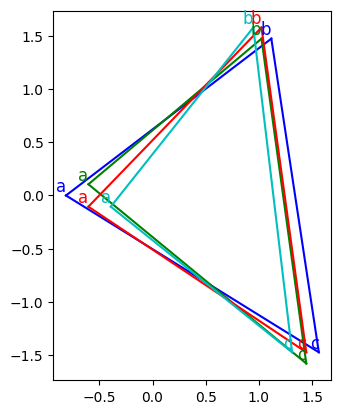

In [84]:
# inc 65 takes 7:30 minutes
import numpy as np
import matplotlib.pyplot as plt

inc = 20
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
ax0,ay0 = -np.sqrt(3)/2,0
bx0,by0 = np.sqrt(3)/2,1
cx0,cy0 = np.sqrt(3)/2,-1
color_index = 0

best = 100.0
plt.gca().set_aspect('equal', adjustable='box')
for mini in minipool:
    for ax in np.linspace(-1,1,inc):
        for by in np.linspace(-1,1,inc):
            for cy in np.linspace(-1,1,inc):
                # if by < -cy: # do only half
                #     continue

                ay, bx, cx = mini.subs({ahat_vx: ax, bhat_vy: by, chat_vy: cy})
                if not (np.isreal(complex(ay)) and np.isreal(complex(bx)) and np.isreal(complex(cx))):
                    continue
                if by < cy:
                    continue
                if np.cos(np.pi/6)*ax + np.sin(np.pi/6)*ay > np.cos(np.pi/6)*bx + np.sin(np.pi/6)*by:
                    continue
                if np.cos(-np.pi/6)*ax + np.sin(-np.pi/6)*ay > np.cos(-np.pi/6)*cx + np.sin(-np.pi/6)*cy:
                    continue

                a_tan = np.arctan2(float(ay), float(ax)) * 180 / np.pi % 360
                if 30 < a_tan <= 180-30 or 180+30 <= a_tan <= 360-30:
                    continue
                b_tan = np.arctan2(float(by), float(bx)) * 180 / np.pi % 360
                if not (30 <= b_tan <= 180):
                    continue
                c_tan = np.arctan2(float(cy), float(cx)) * 180 / np.pi % 360
                if not (270 <= c_tan <= 360-30):
                    continue
                # print(f"ax={ax:.4f}, ay={ay:.4f}, a_tan={a_tan:.2f}, bx={bx:.4f}, by={by:.4f}, b_tan={b_tan:.2f}, cx={cx:.4f}, cy={cy:.4f}, c_tan={c_tan:.2f}, color={color_list[color_index]}")

                ax1, ay1 = ax0 + ax, ay0 + ay
                bx1, by1 = bx0 + bx, by0 + by
                cx1, cy1 = cx0 + cx, cy0 + cy

                score = np.abs(bx1-cx1)
                if score > best:
                    continue
                best = score

                plt.plot([ax1, bx1], [ay1, by1], c= color_list[color_index])
                plt.plot([ax1, cx1], [ay1, cy1], c= color_list[color_index])
                plt.plot([bx1, cx1], [by1, cy1], c= color_list[color_index])
                # plt.scatter([ax, bx, cx], [ay, by, cy], c= color_list[color_index])
                plt.text(ax1, ay1, "a", fontsize=12, color=color_list[color_index], ha='right', va='bottom')
                plt.text(bx1, by1, "b", fontsize=12, color=color_list[color_index], ha='right', va='bottom')
                plt.text(cx1, cy1, "c", fontsize=12, color=color_list[color_index], ha='right', va='bottom')

                color_index = (color_index + 1) % len(color_list)
plt.fill([ax0, bx0, cx0, ax0], [ay0, by0, cy0, ay0], color='k', alpha=0.1)
plt.show()


In [67]:
list(minipool)[0]

(-bhat_vy - chat_vy, -ahat_vx/2 - sqrt(-3*ahat_vx**2 + 2*ahat_vx - 4*bhat_vy**2 - 4*bhat_vy*chat_vy - 4*chat_vy**2 + 1)/2 + 1/2, -ahat_vx/2 + sqrt(-3*ahat_vx**2 + 2*ahat_vx - 4*bhat_vy**2 - 4*bhat_vy*chat_vy - 4*chat_vy**2 + 1)/2 + 1/2)

all (274625, 6)
real (35299, 6)
(35299, 6)
(18007, 6)
(6401, 6)
(5761, 6)
(1114, 6)
(759, 6)
(340, 6)
all (274625, 6)
real (35299, 6)
(35299, 6)
(18007, 6)
(14186, 6)
(5761, 6)
(1114, 6)
(340, 6)
(337, 6)


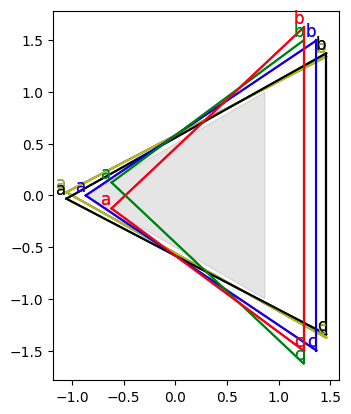

In [116]:
# inc 65 takes 7:30 minutes
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

inc = 65
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
ax0,ay0 = -np.sqrt(3)/2,0
bx0,by0 = np.sqrt(3)/2,1
cx0,cy0 = np.sqrt(3)/2,-1
color_index = 0

best = 100.0
plt.gca().set_aspect('equal', adjustable='box')


lin = np.linspace(-1, 1, inc)+0.j
for mini in minipool:
    ax, by, cy = np.meshgrid(lin, lin, lin, indexing='ij')
    ax = ax.flatten()
    by = by.flatten()
    cy = cy.flatten()

    a_fun, b_fun, c_fun = list(mini)
    ay = sp.lambdify((ahat_vx, bhat_vy, chat_vy), a_fun, 'numpy', cse=True)(ax, by, cy)
    bx = sp.lambdify((ahat_vx, bhat_vy, chat_vy), b_fun, 'numpy', cse=True)(ax, by, cy)
    cx = sp.lambdify((ahat_vx, bhat_vy, chat_vy), c_fun, 'numpy', cse=True)(ax, by, cy)

    abc = np.stack([ax, ay, bx, by, cx, cy], axis=1)
    print("all", abc.shape)

    is_real = np.isreal(abc).all(axis=1)
    abc = abc[is_real]
    print("real", abc.shape)

    abc = abc.real
    print(abc.shape)

    # if by < -cy: # do only half
    #     continue


    b_speed_towards_c = abc[:,3] >= abc[:,5]
    abc = abc[b_speed_towards_c]
    print(abc.shape)

    a_speed_towards_b = np.cos(np.pi/6)*abc[:,0] + np.sin(np.pi/6)*abc[:,1] <= np.cos(np.pi/6)*abc[:,2] + np.sin(np.pi/6)*abc[:,3]
    abc = abc[a_speed_towards_b]
    print(abc.shape)

    a_speed_towards_c = np.cos(-np.pi/6)*abc[:,0] + np.sin(-np.pi/6)*abc[:,1] <= np.cos(-np.pi/6)*abc[:,4] + np.sin(-np.pi/6)*abc[:,5]
    abc = abc[a_speed_towards_c]
    print(abc.shape)

    a_tan = np.arctan2(abc[:,1], abc[:,0]) * 180 / np.pi % 360
    a_dir = ~(np.logical_or((30 <= a_tan) & (a_tan <= 180-30), (180+30 <= a_tan) & (a_tan <= 360-30)))
    abc = abc[a_dir]
    print(abc.shape)

    b_tan = np.arctan2(abc[:,3], abc[:,2]) * 180 / np.pi % 360
    b_dir = (30 <= b_tan) & (b_tan < 180)
    abc = abc[b_dir]
    print(abc.shape)


    c_tan = np.arctan2(abc[:,5], abc[:,4]) * 180 / np.pi % 360
    c_dir = (270 <= c_tan) & (c_tan < 360-30)
    abc = abc[c_dir]
    print(abc.shape)

    for ax, ay, bx, by, cx, cy in abc:
        # print(f"ax={ax:.4f}, ay={ay:.4f}, a_tan={a_tan:.2f}, bx={bx:.4f}, by={by:.4f}, b_tan={b_tan:.2f}, cx={cx:.4f}, cy={cy:.4f}, c_tan={c_tan:.2f}, color={color_list[color_index]}")

        ax1, ay1 = ax0 + ax, ay0 + ay
        bx1, by1 = bx0 + bx, by0 + by
        cx1, cy1 = cx0 + cx, cy0 + cy

        score = np.abs(bx1-cx1)
        if score > best:
            continue
        best = score

        plt.plot([ax1, bx1], [ay1, by1], c= color_list[color_index])
        plt.plot([ax1, cx1], [ay1, cy1], c= color_list[color_index])
        plt.plot([bx1, cx1], [by1, cy1], c= color_list[color_index])
        # plt.scatter([ax, bx, cx], [ay, by, cy], c= color_list[color_index])
        plt.text(ax1, ay1, "a", fontsize=12, color=color_list[color_index], ha='right', va='bottom')
        plt.text(bx1, by1, "b", fontsize=12, color=color_list[color_index], ha='right', va='bottom')
        plt.text(cx1, cy1, "c", fontsize=12, color=color_list[color_index], ha='right', va='bottom')

        color_index = (color_index + 1) % len(color_list)
plt.fill([ax0, bx0, cx0, ax0], [ay0, by0, cy0, ay0], color='k', alpha=0.1)
plt.show()